In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Generate bivariate data with a few Gaussians of Different Means and Covariance

/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brianxia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


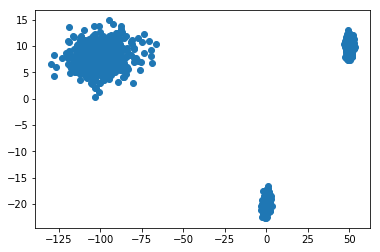

In [74]:
mean1 = [0, -20]
cov1 = [[1,0.5], [0,1]]
g1 = np.random.multivariate_normal(mean1, cov1, 500)
mean2 = [50, 10]
cov2 = [[1,0],[0,1]]
g2 = np.random.multivariate_normal(mean2, cov2, 500)
mean3 = [-100, 8]
cov3 = [[100,1.5],[1,6]]
g3 = np.random.multivariate_normal(mean3, cov3, 500)
data = np.vstack((np.vstack((g1, g2)), g3))
plt.scatter(data[:,0], data[:,1])

## A Fully Vectorized Vanilla Kmean for Bivariate Data
#### Implemented as a baseline to compare with the tensor method

[[-31.86933622   6.09255239]
 [  1.72034291  -0.31819333]
 [  0.83813877   4.47866406]]
('...', 0, '...', 87.3613428068082)
('...', 1, '...', 26.530502299961075)
('...', 2, '...', 0.0)
('...', 3, '...', 0.0)
('...', 4, '...', 0.0)


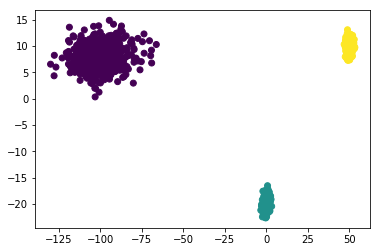

In [106]:
def bivariate_kmean(k, data, tolerance, iteration):
    m = data.mean(axis=0)
    s = data.std(axis=0)
    means = (np.random.rand(k, 2) - 0.5) * [m - s, m, m + s]
    print means
    tol = float('inf')
    count = 0
    while (tol > tolerance and count < iteration) or count < 5:
        assignments = np.power(np.power(data - means[:,None], 2).sum(axis=2), 0.5).argmin(axis=0)
        mask = assignments == np.linspace(0,k-1,k)[:,None]
        new_means = (data * mask[...,None]).sum(axis=1) / mask.sum(axis=1)[...,None]
        tol = (((means - new_means)**2).sum())**.5
        means = new_means
        print ("...", count, "...", tol)
        count += 1
    return means, assignments

k = 3
means, assigments = bivariate_kmean(k, data, 0.0001, 100)
plt.scatter(data[:,0], data[:,1], c=assigments)

## Applying PCA to Data
#### Reduce data to one dimension and plot to visualize data projections

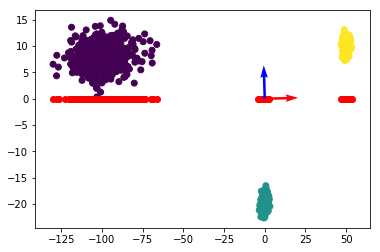

In [107]:
cov = np.cov(data.T)
w, v = np.linalg.eig(cov)
transformed_data = np.dot(data, v[0])

plt.scatter(data[:,0], data[:,1], c=assigments)
plt.scatter(transformed_data, [0]*1500, color='r')
plt.quiver([0,0], [0,0], v[:,0], v[:,1], color=['red','blue'], scale=10)

## Applying SVD to Data Cluster